In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
import math
import numpy as np

# 1. Загрузка и подготовка данных

In [2]:
df1 = pd.read_csv ('/datasets/geo_data_0.csv')
df2 = pd.read_csv ('/datasets/geo_data_1.csv')
df3 = pd.read_csv ('/datasets/geo_data_2.csv')
id1 = df1['id']
id2 = df2['id']
id3 = df3['id']

In [3]:
display("DF1", df1.describe(),
"DF2", df2.describe(),
"DF3", df3.describe())

'DF1'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'DF2'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'DF3'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [4]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

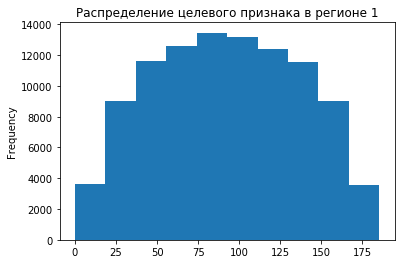

In [5]:
df1['product'].plot(kind="hist", title="Распределение целевого признака в регионе 1",)

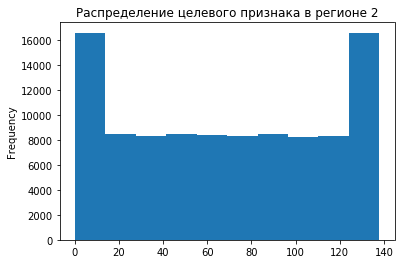

In [6]:
df2['product'].plot(kind="hist", title="Распределение целевого признака в регионе 2",)

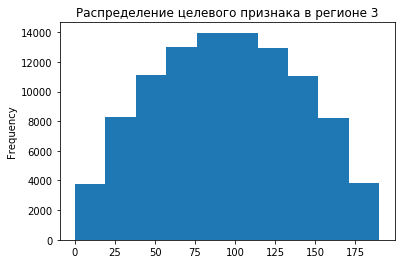

In [7]:
df3['product'].plot(kind="hist", title="Распределение целевого признака в регионе 3",)

In [8]:
display("Кореляция признаков в DF1:", df1.corr())
display("Кореляция признаков в DF2:", df2.corr())
display("Кореляция признаков в DF3:", df3.corr())

'Кореляция признаков в DF1:'

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


'Кореляция признаков в DF2:'

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


'Кореляция признаков в DF3:'

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


#### Распределение целевого признака в регионах 1 и 3 считаю нормальным, в то время как регион 2 имеет бимодальное распределение с пиками в минимуме и максимуме добычи.
#### Т.к. признаки зашифрованы, то линейной зависимости исходя из матрицы кореляции судить достоверно нельзя, но судя по всему наисильнейшую связь имеет признак f2 и product во всех трех регионах. Так же в первом регионе имеется связь между f0 и f1 признаками.

#### Данные не содержат пропусков, средние значения очень близки к медианным значениям, значит выбросов в данных так же нет. Из датасетов удалим столлбцы с id месторождения, т.к. для обучения модели они не несут никакой информации.
#### Масштабировать признаки мы не будем, судя по значениям в таблицах они уже отмасштабированы.

In [9]:
df1 = df1.drop ('id', axis = 1)
df2 = df2.drop ('id', axis = 1)
df3 = df3.drop ('id', axis = 1)

In [10]:
def splitter (df, testsize, printshape):
    df_train, df_valid = train_test_split(df, test_size = testsize, random_state = 42)
    features_train = df_train.drop('product', axis = 1)
    target_train = df_train['product']
    features_valid = df_valid.drop('product', axis = 1)
    target_valid = df_valid['product']
    if printshape == "yes":
        display(features_train.shape)
        display(target_train.shape)
        display(features_valid.shape)
        display(target_valid.shape)
        return features_train, target_train, features_valid, target_valid
    else:
        return features_train, target_train, features_valid, target_valid

In [11]:
features_train, target_train, features_valid, target_valid = splitter (df1, 0.25, "yes")

(75000, 3)

(75000,)

(25000, 3)

(25000,)

In [12]:
features_train, target_train, features_valid, target_valid = splitter (df2, 0.25, "yes")

(75000, 3)

(75000,)

(25000, 3)

(25000,)

In [13]:
features_train, target_train, features_valid, target_valid = splitter (df3, 0.25, "yes")

(75000, 3)

(75000,)

(25000, 3)

(25000,)

# 2. Обучение и проверка модели

In [14]:
def regressor (df, printing):
    features_train, target_train, features_valid, target_valid = splitter (df, 0.25, "")
    model = LinearRegression (n_jobs = -1)
    model.fit (features_train, target_train)
    predicted_valid = model.predict(features_valid)
    mse = mean_squared_error(target_valid, predicted_valid)
    # сравним с константной моделью
    constanta = DummyRegressor(strategy = "mean")
    constanta.fit(features_train,target_train)
    constanta_pred = constanta.predict(features_valid)
    mse_c = mean_squared_error(target_valid, constanta_pred)
    if printing == "yes":
        print("Предсказания модели (сред.):", predicted_valid.mean())
        print("Фактические запасы (сред.):", target_valid.mean())
        print("Предсказания константной модели (сред.):",constanta_pred.mean())
        print("RMSE", mse ** 0.5)
        print("RMSE константной модели", mse_c ** 0.5)
    else:
        return features_valid, target_valid, predicted_valid

In [15]:
regressor (df1, "yes")

Предсказания модели (сред.): 92.39879990657768
Фактические запасы (сред.): 92.32595637084387
Предсказания константной модели (сред.): 92.55801454305204
RMSE 37.75660035026169
RMSE константной модели 44.27723501700235


In [16]:
regressor (df2, "yes")

Предсказания модели (сред.): 68.71287803913764
Фактические запасы (сред.): 68.72538074722745
Предсказания константной модели (сред.): 68.85820641759086
RMSE 0.8902801001028828
RMSE константной модели 45.9448594176429


In [17]:
regressor (df3, "yes")

Предсказания модели (сред.): 94.77102387765939
Фактические запасы (сред.): 95.15099907171961
Предсказания константной модели (сред.): 94.9496669760935
RMSE 40.145872311342174
RMSE константной модели 44.78277680055413


# 3. Подготовка к расчёту прибыли

Условия задачи:  
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).  
- При разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли.  
- Бюджет на разработку скважин в регионе — 10 млрд рублей.  
- Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  

In [18]:
SAMPLE = 500 # выборка 500 случайных точек
BEST = 200 # из условия задачи это 200 лучших точек для расчета прибыли.
BUDGET = 10000000000 # из условия задачи выделенные деньги на разработку месторождений
PER_ONE_PRODUCT = 450000 # по условию доход с каждой единицы графы product составляет 450 тыс., т.к. там все в тыс.баррелей 
NEED_PRODUCT = BUDGET / PER_ONE_PRODUCT # меньше какого значения добыча сырья будет убыточна
MEAN_200 = NEED_PRODUCT / BEST # сколько в среднем нужно добывать сырья с одной из 200 предполагаемых точек

In [19]:
features_valid, target_valid1, predicted_valid1 = regressor (df1, "no")
features_valid, target_valid2, predicted_valid2 = regressor (df2, "no")
features_valid, target_valid3, predicted_valid3 = regressor (df3, "no")
print("Необходимая добыча с точки - {:.0f} тыс. баррелей".format(math.ceil(MEAN_200)))
print("Средняя предполагаемая добыча с точки в 1 регионе - {:.0f} тыс. баррелей".
      format(math.ceil(target_valid1.mean())))
print("Средняя предполагаемая добыча с точки в 2 регионе - {:.0f} тыс. баррелей".
      format(math.ceil(target_valid2.mean())))
print("Средняя предполагаемая добыча с точки в 3 регионе - {:.0f} тыс. баррелей".
      format(math.ceil(target_valid3.mean())))

Необходимая добыча с точки - 112 тыс. баррелей
Средняя предполагаемая добыча с точки в 1 регионе - 93 тыс. баррелей
Средняя предполагаемая добыча с точки в 2 регионе - 69 тыс. баррелей
Средняя предполагаемая добыча с точки в 3 регионе - 96 тыс. баррелей


#### Из условий задачи получается, что необходимая добыча с каждой точки (с прибылью) составляет 112 тыс. баррелей. В среднем же в регионах можно добывать 93 тыс. баррелей, 69 тыс. баррелей и 95 тыс. баррелей соответственно. Т.к. нам необходимо отобрать 200 самых прибыльных точек, опираясь на предсказания моделей - будем искать самые богатые месторождения.

# 4. Расчёт прибыли

#### Функция делает из валидационной выборки датафрейм для дальнейшей работы

In [20]:
def valid (df):
    features_valid, target_valid, predicted_valid = regressor (df, "no")
    df_valid = features_valid.join(target_valid, how='left')
    df_valid['predict'] = predicted_valid
    return df_valid

#### Создадим функцию для бутстрепа

In [21]:
state = np.random.RandomState (42)

In [22]:
def interval (df, cicle, sample, chunk):
    values = []
    count = 0
    for i in range(cicle):
        subsample = df.sample(n = sample, replace = True, random_state = state)
        best = best_of_the_best (subsample, chunk)
        if best >= 0:
            values.append(best)
        if best < 0:
            count += 1
            values.append(best)
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    print("Средняя прибыль с региона {:.2f} млрд. рублей.".format (mean))
    print("95% доверительный интервал находится в пределах от {:.2f}".format (lower), 
              "до {:.2f} млрд. руб".format (upper))
    print ("Риск убытков составляе: {:.1%}". format (count / cicle))

#### Создадим функцию которая будет по датафрейму региона определять прибыль (убыток) добычи с 200 лучших точек

In [23]:
def best_of_the_best (subsample, chunk):
    barrel = subsample.sort_values (by = ['predict'], ascending = False)[:chunk]['product'].sum()
    money = (barrel * PER_ONE_PRODUCT - BUDGET) / 1000000000
    return (money)

In [24]:
df_valid = valid(df1)
interval (df_valid, 1000, 500, 200)

Средняя прибыль с региона 0.40 млрд. рублей.
95% доверительный интервал находится в пределах от -0.11 до 0.90 млрд. руб
Риск убытков составляе: 6.0%


In [25]:
df_valid = valid(df2)
interval (df_valid, 1000, 500, 200)

Средняя прибыль с региона 0.45 млрд. рублей.
95% доверительный интервал находится в пределах от 0.05 до 0.83 млрд. руб
Риск убытков составляе: 0.9%


In [26]:
df_valid = valid(df3)
interval (df_valid, 1000, 500, 200)

Средняя прибыль с региона 0.38 млрд. рублей.
95% доверительный интервал находится в пределах от -0.13 до 0.91 млрд. руб
Риск убытков составляе: 7.5%


### ВЫВОД:
#### На основе предсказаний модели линейной регрессии, обученной на представленных наборах данных по регионам, мы выстроили предсказания для всех предложенных регионов и определили:
- к разработке 200 месторождений предлагается регион за номером 2, как имеющий наименьший риск убытков.
- его прибыль составит от 0.06 до 0.83 млрд. руб